# Basics

This notebook will give an overview of some of the basic functions in relastat.

In [1]:
import relastat as rs
import pandas as pd
import numpy as np

We will use a simple toy dataset which is created below.Thi can be thought of as a graph with nodes `a1`, `a2`, `b1` and `b2`, in two time points `1` and `2`.  

In [2]:
df = pd.DataFrame(
    {'A': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
        'B': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
        'ID': [1, 1, 1, 1, 2, 2, 2, 2]})
print(df)

    A   B  ID
0  a1  b1   1
1  a1  b2   1
2  a2  b1   1
3  a2  b2   1
4  a1  b1   2
5  a1  b2   2
6  a2  b1   2
7  a2  b2   2


In the function `rs.matrix_from_tables()`, we define which columns we want relationships between and whether there is a time column (if so, which column that is). The function can also take in a list of dataframes.

In [10]:
relationships = ['A', 'B']
time_col = 'ID'

A, attributes = rs.matrix_from_tables(
    df, relationships, dynamic_col=None, join_token='::')

['A', 'B']


Next shows how to find connected components of the matrix which contain the most elements from the specified partition. 

In [11]:
c0, att0 = rs.find_cc_containing_most(A, attributes, partition='B', dynamic=False)
c1, att1 = rs.find_cc_containing_most(
    A, attributes, partition='A', dynamic=True)

Number of connected components: 2
Number of connected components: 2


We can convert a matrix and attribute matrix into a networkx object.

In [12]:
G = rs.to_networkx(A, attributes)

Extracting node attributes for labels and colours to plot.

In [13]:
node_times = [G.nodes(data=True)[node]['time'] for node in G.nodes()]
node_labels = {node: G.nodes(data=True)[node]['name'] for node in G.nodes()}

time_colours = {np.nan: 'lightgrey', 1: 'red', 2.: 'lightblue'}
node_colors = [time_colours[node_color] for node_color in node_times]

Plot the networkx graph.

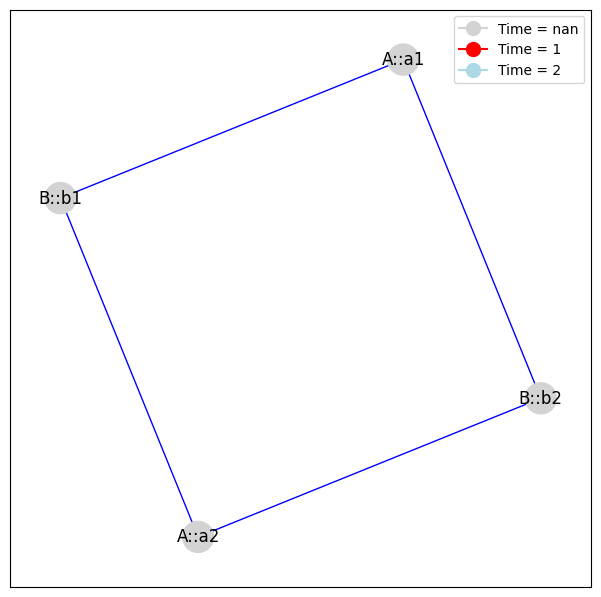

In [14]:
## plot the netowrkx graph G    
import matplotlib.pyplot as plt 
import networkx as nx
from matplotlib.lines import Line2D

plt.figure(figsize=(7.5,7.5)) 
pos = nx.spring_layout(G)   

# Drawing nodes with colors based on time and labels based on name
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='b', arrows=True)


legend_elements = [Line2D([0], [0], marker='o', color='lightgrey', label='Time = nan',
                          markerfacecolor='lightgrey', markersize=10),
                   Line2D([0], [0], marker='o', color='red', label='Time = 1',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='lightblue', label='Time = 2',
                          markerfacecolor='lightblue', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')


plt.show()